In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_17140\1841507007.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


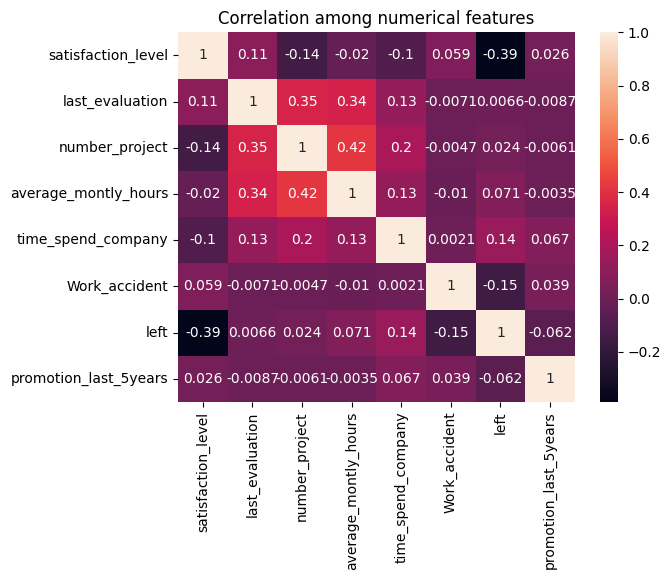

In [6]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation among numerical features')
plt.show()

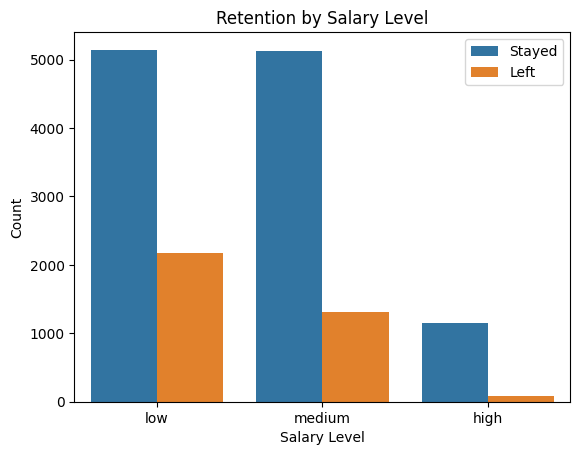

In [7]:
sns.countplot(x='salary', hue='left', data=df, order=['low', 'medium', 'high'])
plt.title('Retention by Salary Level')
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.legend(['Stayed', 'Left'])
plt.show()


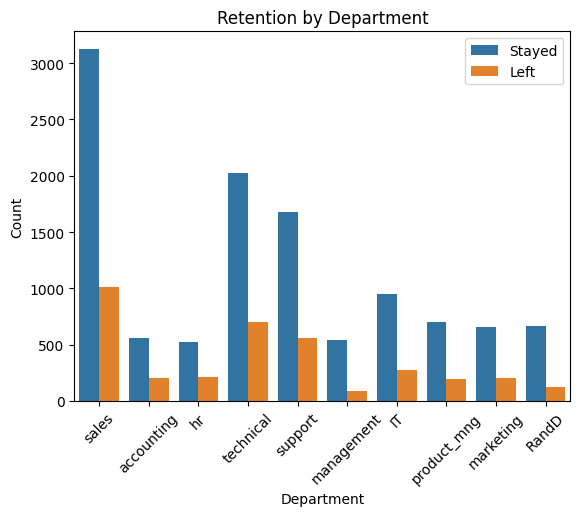

In [8]:
sns.countplot(x='Department', hue='left', data=df)
plt.title('Retention by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(['Stayed', 'Left'])
plt.xticks(rotation=45)
plt.show()


In [9]:
le = LabelEncoder()
df['salary'] = le.fit_transform(df['salary'])
df['Department'] = le.fit_transform(df['Department'])

In [10]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [11]:
x = df.drop(columns=['left'])
y = df['left']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=55)

In [13]:
x_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
10827,0.65,0.98,3,252,2,0,0,6,0
2990,0.74,0.48,5,144,3,0,0,7,2
6780,0.83,0.71,3,243,2,1,0,0,1
4828,0.19,0.80,4,249,5,0,0,7,1
7602,0.98,0.85,4,178,3,0,0,8,2
...,...,...,...,...,...,...,...,...,...
11714,0.51,0.75,3,133,3,0,0,7,2
5319,0.67,0.59,3,205,5,0,0,8,2
8149,0.95,0.89,5,132,4,0,0,9,2
14724,0.11,0.89,6,293,4,0,0,8,1


In [14]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_train

array([[ 0.11191507, -0.667812  , -0.64778599, ..., -0.14557297,
         0.40216028, -0.55285068],
       [-0.97464614, -1.42736744, -1.45998913, ..., -0.14557297,
         0.05517522,  1.05025597],
       [ 0.2728871 , -0.78466668,  0.16441715, ..., -0.14557297,
         0.40216028,  1.05025597],
       ...,
       [-0.69294508, -0.90152137, -1.45998913, ..., -0.14557297,
         0.74914534,  1.05025597],
       [ 0.91677522,  0.67601686, -0.64778599, ..., -0.14557297,
        -1.33276501, -2.15595733],
       [ 0.99726124,  0.7344442 ,  0.16441715, ..., -0.14557297,
        -2.02673512, -0.55285068]])

In [15]:
x_test = scalar.transform(x_test)
x_test

array([[ 0.15215808,  1.55242698, -0.64778599, ..., -0.14557297,
         0.05517522, -2.15595733],
       [ 0.51434515, -1.3689401 ,  0.9766203 , ..., -0.14557297,
         0.40216028,  1.05025597],
       [ 0.87653221, -0.02511124, -0.64778599, ..., -0.14557297,
        -2.02673512, -0.55285068],
       ...,
       [ 1.35944831,  1.02658091,  0.9766203 , ..., -0.14557297,
         1.09613039,  1.05025597],
       [-2.02096433,  1.02658091,  1.78882344, ..., -0.14557297,
         0.74914534, -0.55285068],
       [ 0.23264409, -0.49252998, -0.64778599, ..., -0.14557297,
        -0.29180983,  1.05025597]])

In [16]:
lr = LogisticRegression(max_iter=1000)
lr

LogisticRegression(max_iter=1000)

In [17]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [18]:
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [19]:
pd.DataFrame({'y_test' : y_test, 'y_predict' : y_pred})

,y_test,y_predict
10827,0,0
2990,0,0
6780,0,0
4828,0,1
7602,0,0
...,...,...
11714,0,0
5319,0,0
8149,0,0
14724,1,1


In [20]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))

Accuracy Score:  0.764
